# *Quick Start
Ejecutar esta celda.

Las celdas marcadas con un asterisco (*) deben ser ejecutadas para que las demás celdas puedan funcionar

In [1]:
import sys
sys.path.append('tsp')
import os
from os import path, listdir
from tsp import benchmarks,metrics,tspplot
from tsp.tspobject import TSPObject


benchmark_path = r'benchmarks'

---
# Adquisión de datos

In [ ]:
benchmarks.download_tsp_heidelberg(output_folder=benchmark_path)
benchmarks.download_tsp_waterloo(output_folder=benchmark_path)

### Resumen de los benchmarks

In [2]:
df = benchmarks.benchmark_folder_info(benchmark_path)
df

,COMMENT,DIMENSION,DISPLAY_DATA_TYPE,EDGE_WEIGHT_FORMAT,EDGE_WEIGHT_TYPE,NODE_COORD_TYPE,TYPE
NAME,,,,,,,
a280,drilling problem (Ludwig),280,NaN,NaN,EUC_2D,NaN,TSP
ali535,535 Airports around the globe (Padberg/Rinaldi),535,COORD_DISPLAY,NaN,GEO,NaN,TSP
ar9152,9152 locations in Argentina Derived from Natio...,9152,NaN,NaN,EUC_2D,NaN,TSP
att48,48 capitals of the US (Padberg/Rinaldi),48,NaN,NaN,ATT,NaN,TSP
att532,532-city problem (Padberg/Rinaldi),532,NaN,NaN,ATT,NaN,TSP
bayg29,"29 Cities in Bavaria, geographical distances (...",29,TWOD_DISPLAY,UPPER_ROW,EXPLICIT,NaN,TSP
bays29,"29 cities in Bavaria, street distances (Groets...",29,TWOD_DISPLAY,FULL_MATRIX,EXPLICIT,NaN,TSP
berlin52,52 locations in Berlin (Groetschel),52,NaN,NaN,EUC_2D,NaN,TSP
bier127,127 Biergaerten in Augsburg (Juenger/Reinelt),127,NaN,NaN,EUC_2D,NaN,TSP


### Creación de benchmarks con polígonos regulares
Ejemplo: dos octágonos regulares de radio 10 cuyos centros están sobre el eje $x$ separados a 21 unidades de distancia. 

El resultado se escribe al archivo ``geometry.tsp``

In [ ]:
point_list = benchmarks.regular_polygon(edges=8,radius=10,center=(0,0))
point_list += benchmarks.regular_polygon(edges=8,radius=10,center=(21,0))
benchmarks.polygon_to_TSPLIB(point_list,'octagons.tsp')

---
# *TSPObject
Objeto principal para manipular el problema

In [4]:
test_file = path.join(benchmark_path,'dj38.tsp')
O = TSPObject(test_file,metrics.euc_dist)

### Imprimir los nombres de los nodos y las coordenadas

In [5]:
print(O.V) #Nombres de los nodos
print(O.points) #Coordenadas de los puntos, el orden corresponde al de O.V

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38']
[(42102.5, 11003.6111), (42373.8889, 11108.6111), (42885.8333, 11133.3333), (42712.5, 11155.8333), (42933.3333, 11183.3333), (42853.3333, 11297.5), (42929.4444, 11310.2778), (42983.3333, 11416.6667), (43000.2778, 11423.8889), (42057.2222, 11438.3333), (43252.7778, 11461.1111), (43187.2222, 11485.5556), (42855.2778, 11503.0556), (42106.3889, 11511.3889), (42841.9444, 11522.2222), (43136.6667, 11569.4444), (43150.0, 11583.3333), (43148.0556, 11595.0), (43150.0, 11600.0), (42686.6667, 11690.5556), (41836.1111, 11715.8333), (42814.4444, 11751.1111), (42651.9444, 11770.2778), (42884.4444, 11785.2778), (42673.6111, 11822.7778), (42660.5556, 11846.9444), (43290.5556, 11963.0556), (43026.1111, 11973.0556), (42195.5556, 12058.3333), (42477.5, 12149.4444), (43355.5556, 12286.9444

### Encontrar los vecinos del nodo '1'
La función regresa una tupla de dos elementos: el primero es el nombre del nodo vecino, y el segundo la distancia según la métrica especificada en el constructor.

In [6]:
print(list(O.neighbors('1')))

[('2', 290.99301545433866), ('3', 794.0018312710164), ('4', 628.7062892741252), ('5', 850.0494347752532), ('6', 806.3010169484456), ('7', 881.9759098638978), ('8', 972.873183452112), ('9', 991.2811948915838), ('10', 437.07375847296123), ('11', 1237.9197337359349), ('12', 1186.9678817276742), ('13', 903.3931728506116), ('14', 507.7926916725464), ('15', 903.1807647058093), ('16', 1178.8418412907574), ('17', 1197.2193112261596), ('18', 1201.2191072966534), ('19', 1205.3779366004712), ('20', 901.7446864102617), ('21', 760.410092131903), ('22', 1032.2892417783694), ('23', 943.2215951621602), ('24', 1105.6400293858078), ('25', 998.6000054737141), ('26', 1011.2552138704898), ('27', 1527.0919609740627), ('28', 1338.9847283010597), ('29', 1058.8192781887758), ('30', 1205.6363263392866), ('31', 1793.625572849654), ('32', 1337.936789400792), ('33', 1714.40563803204), ('34', 1740.6001775427158), ('35', 1498.45358451041), ('36', 1852.3537304910717), ('37', 1624.7519408767353), ('38', 1858.092612716

### Encontrar la distancia entre dos vértices cualesquiera

In [7]:
print(O.distance('1','2'))
print(O.distance('2','3'))
print(O.distance('3','1'))

290.99301545433866
512.5409796925513
794.0018312710164


### Encontrar la distancia de un tour cualquiera

In [8]:
print(O.evaluate_tour(['1','2','3']))

1597.5358264179063


---
# Dibujar

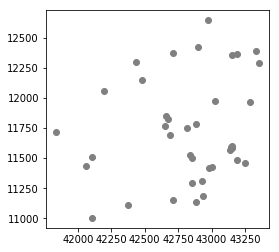

In [6]:
#Dibujar mapa
tspplot.plot_tsp(O,figsize=(4,4))

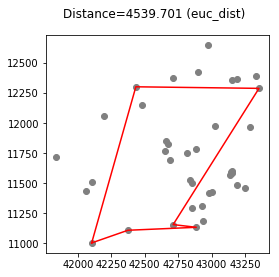

In [8]:
#Dibujar con un tour
tspplot.plot_tsp(O,tour=['1','2','3','4','31','32'], figsize=(4,4))